In [106]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
import requests

url = "http://0.0.0.0:8000/tunnel/point"

response = requests.get(url)
print(response.status_code)
print(response.json())

200
{'err': 0, 'data': [[-8.25041227769142, -55.17685588652, 0.619519246511073, 'jc1'], [-8.17711736493474, -45.4946733035753, -0.833248654252203, 'jc1'], [-11.3237274510885, -54.7322225787412, -0.741401263322975, 'jc1'], [-13.3974385377375, -54.2829061530929, 0.665661563804599, 'jc1'], [-13.3040581912073, -54.3012010684599, 2.24041774371044, 'jc1'], [-4.98548293210688, -35.898469030872, 0.87701741671521, 'jc2'], [-8.17717873050415, -45.4946946344065, -0.832885113039116, 'jc2'], [-9.7074970262532, -45.1948044187776, -0.854094743453206, 'jc2'], [-11.870263129032, -45.4622946656112, 0.459547745636723, 'jc2'], [-11.7861433795561, -45.4344253323938, 2.1446848770042, 'jc2'], [-7.27991828700309, -44.7035077065122, -0.826098535618528, 'jc3'], [-8.17728080727888, -45.4947530276968, -0.832857634963538, 'jc3'], [-9.70763551853321, -45.1946732751124, -0.854048901003128, 'jc3'], [-10.2562818573821, -35.0774176879201, 0.430010396946658, 'jc3'], [-10.1651146167103, -35.0728424365923, 1.8635554352071

In [333]:
target = response.json()['data'][20]
x, y, z, cate = target

In [334]:
df = pd.read_excel('深圳地铁轨道数据.xlsx')
df = df[~df['测点编号'].isin(['kz1', 'kz2', 'kz3', 'kz4'])]
df['测点编号2'], df['测点编号2_index'] = df['测点编号'].str.split('-').str[0], df['测点编号'].str.split('-').str[1]

In [335]:
df_index = df.iloc[:55, :]
df = (df.sort_values(by = ['测点编号', '采集时间'], ascending = [True, True])
        .reset_index(drop = True))

In [336]:
window = 1
for col in ['东累计变形量(mm)', '北累计变形量(mm)', '高程累计变形量(mm)']:
    df[f'{col}_mean'] = (
                df
                .groupby('测点编号')[col]
                .rolling(window, min_periods=1)
                .mean()
                .reset_index(level=0, drop=True))

In [337]:
df[['东累计变形量(mm)', '东累计变形量(mm)_mean']]

,东累计变形量(mm),东累计变形量(mm)_mean
0,-0.705834,-0.705834
1,-0.601951,-0.601951
2,-0.615088,-0.615088
3,-0.197185,-0.197185
4,-0.484272,-0.484272
...,...,...
2305,0.011904,0.011904
2306,-0.001800,-0.001800
2307,0.157228,0.157228
2308,0.049996,0.049996


In [266]:
df_target = df_index[df_index.测点编号2 == cate]

In [269]:
df_target['diff'] = (
    df_target[['东坐标', '北坐标', '高程']]
    .apply(lambda row: (row['东坐标'] - x) +
                      (row['北坐标'] - y) +
                      (row['高程'] - z), axis=1)
)

/tmp/ipykernel_12035/855363251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['diff'] = (


In [273]:
df_target['diff'] == 0

20     True
21    False
22    False
23    False
24    False
Name: diff, dtype: bool

In [272]:
df_target['diff'].idxmin()

np.int64(23)

In [228]:
#df_target['diff'] = df[['东坐标', '北坐标', '高程']].apply(lambda i: (i[0] - x) + (i[1] - y) + (i[2] - z))


PointNo = df_index[(df_index.测点编号2 == cate) & (df_index.东坐标 == x)]['测点编号'].values[0]

In [229]:
df_point = df[df.测点编号 == PointNo].reset_index(drop=True).reset_index()

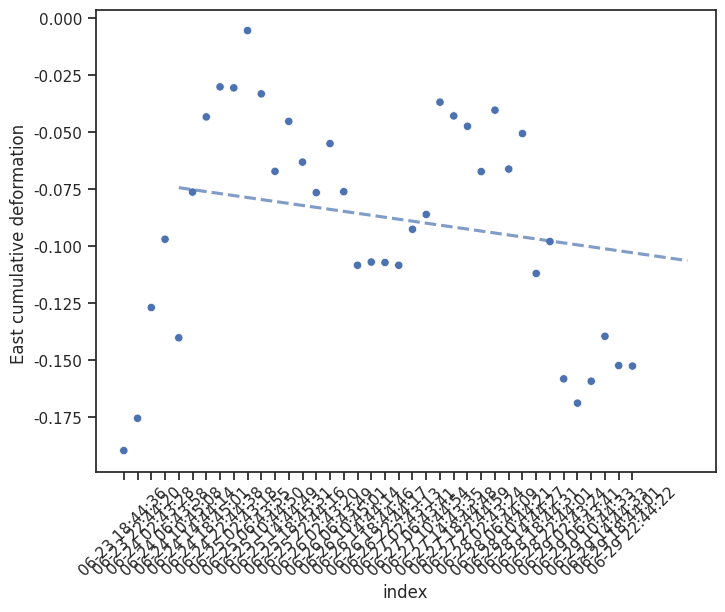

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# rc = {'axes.unicode_minus': False}
sns.set_theme(context='notebook', style='ticks')
fig, ax = plt.subplots(figsize=(8, 6))


sns.scatterplot(data=df_point[window - 1:], x='采集时间', y='东累计变形量(mm)_mean',hue = '测点编号', ax=ax)
sns.regplot(
        data=df_point[window - 1:],
        x='index',
        y='东累计变形量(mm)_mean',
        ci=None,
        scatter=False,  # 不重复绘制散点
        truncate=True,  # 不延长趋势线到数据范围外
        line_kws={'alpha': 0.7, 'linestyle': '--'},  # 设置线样式
        ax=ax
    )
ax.legend().remove()
ax.set_ylabel('East cumulative deformation ')
plt.xticks(rotation=45)
plt.show()

In [233]:
df_point.columns

Index(['index', '测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '水平角(°)', '竖直角(°)',
       '斜距(m)', '采集时间', '备注', '测点编号2', '测点编号2_index', '东累计变形量(mm)_mean',
       '北累计变形量(mm)_mean', '高程累计变形量(mm)_mean'],
      dtype='object')

In [232]:
df_point.iloc[window - 1 :][['index', '东累计变形量(mm)_mean']].corr()

,index,东累计变形量(mm)_mean
index,1.000000,-0.199839
东累计变形量(mm)_mean,-0.199839,1.000000


In [ ]:
output = (
        df_point[['index' ,'东累计变形量(mm)_mean','北累计变形量(mm)_mean', '高程累计变形量(mm)_mean']]
        .to_dict(orient="list")
    )

a = {"err": 0, "x": list(zip(output["index"], output["东累计变形量(mm)_mean"])),
     "y": list(zip(output["index"], output["北累计变形量(mm)_mean"])),
     "z": list(zip(output["index"], output["高程累计变形量(mm)_mean"])),
    }

In [250]:
a

{'err': 0,
 'x': [(0, -0.13537375546413),
  (1, -0.2307519251831815),
  (2, -0.23271060445069966),
  (3, -0.18041675758984088),
  (4, -0.1895890880120989),
  (5, -0.17543854069375103),
  (6, -0.12686385166631464),
  (7, -0.09691064071297728),
  (8, -0.1401314530013132),
  (9, -0.07623030854873032),
  (10, -0.043263540537008406),
  (11, -0.03007939312658068),
  (12, -0.03053310596108346),
  (13, -0.0053974465576088594),
  (14, -0.03315202986398078),
  (15, -0.0671410299331931),
  (16, -0.04522670909103961),
  (17, -0.06309508373565358),
  (18, -0.07648164998892418),
  (19, -0.05496597449718969),
  (20, -0.07606259492778378),
  (21, -0.10832534105000846),
  (22, -0.10691554912289906),
  (23, -0.10712112058239867),
  (24, -0.10833027849441748),
  (25, -0.09254583796849407),
  (26, -0.0860368157327152),
  (27, -0.036801009450559995),
  (28, -0.0428293930105462),
  (29, -0.047384180045195824),
  (30, -0.06724921121845641),
  (31, -0.04029953679749454),
  (32, -0.06612886746211188),
  (33, -

In [9]:
import requests

url = "http://0.0.0.0:8800/tunnel/point"

response = requests.get(url)
print(response.status_code)
print(response.json())

200
{'err': 0, 'data': [[-8.25041227769142, -55.17685588652, 0.619519246511073, 'jc1'], [-8.17711736493474, -45.4946733035753, -0.833248654252203, 'jc1'], [-11.3237274510885, -54.7322225787412, -0.741401263322975, 'jc1'], [-13.3974385377375, -54.2829061530929, 0.665661563804599, 'jc1'], [-13.3040581912073, -54.3012010684599, 2.24041774371044, 'jc1'], [-4.98548293210688, -35.898469030872, 0.87701741671521, 'jc2'], [-8.17717873050415, -45.4946946344065, -0.832885113039116, 'jc2'], [-9.7074970262532, -45.1948044187776, -0.854094743453206, 'jc2'], [-11.870263129032, -45.4622946656112, 0.459547745636723, 'jc2'], [-11.7861433795561, -45.4344253323938, 2.1446848770042, 'jc2'], [-7.27991828700309, -44.7035077065122, -0.826098535618528, 'jc3'], [-8.17728080727888, -45.4947530276968, -0.832857634963538, 'jc3'], [-9.70763551853321, -45.1946732751124, -0.854048901003128, 'jc3'], [-10.2562818573821, -35.0774176879201, 0.430010396946658, 'jc3'], [-10.1651146167103, -35.0728424365923, 1.8635554352071

In [344]:
import requests

url = "http://0.0.0.0:8000/tunnel/point"

response = requests.get(url)
print(response.status_code)
print(response.json())

200
{'err': 0, 'data': [[-8.25041227769142, -55.17685588652, 0.619519246511073, 'jc1'], [-8.17711736493474, -45.4946733035753, -0.833248654252203, 'jc1'], [-11.3237274510885, -54.7322225787412, -0.741401263322975, 'jc1'], [-13.3974385377375, -54.2829061530929, 0.665661563804599, 'jc1'], [-13.3040581912073, -54.3012010684599, 2.24041774371044, 'jc1'], [-4.98548293210688, -35.898469030872, 0.87701741671521, 'jc2'], [-8.17717873050415, -45.4946946344065, -0.832885113039116, 'jc2'], [-9.7074970262532, -45.1948044187776, -0.854094743453206, 'jc2'], [-11.870263129032, -45.4622946656112, 0.459547745636723, 'jc2'], [-11.7861433795561, -45.4344253323938, 2.1446848770042, 'jc2'], [-7.27991828700309, -44.7035077065122, -0.826098535618528, 'jc3'], [-8.17728080727888, -45.4947530276968, -0.832857634963538, 'jc3'], [-9.70763551853321, -45.1946732751124, -0.854048901003128, 'jc3'], [-10.2562818573821, -35.0774176879201, 0.430010396946658, 'jc3'], [-10.1651146167103, -35.0728424365923, 1.8635554352071

In [310]:
target = response.json()['data'][10]
x, y, z, cate = target
a = {'x':x, 'y': y, 'z': z, 'cate': cate}

In [345]:
import requests

url = "http://0.0.0.0:8000/tunnel/point"

response = requests.get(url)
print(response.status_code)
print(response.json())

200
{'err': 0, 'data': [[-8.25041227769142, -55.17685588652, 0.619519246511073, 'jc1'], [-8.17711736493474, -45.4946733035753, -0.833248654252203, 'jc1'], [-11.3237274510885, -54.7322225787412, -0.741401263322975, 'jc1'], [-13.3974385377375, -54.2829061530929, 0.665661563804599, 'jc1'], [-13.3040581912073, -54.3012010684599, 2.24041774371044, 'jc1'], [-4.98548293210688, -35.898469030872, 0.87701741671521, 'jc2'], [-8.17717873050415, -45.4946946344065, -0.832885113039116, 'jc2'], [-9.7074970262532, -45.1948044187776, -0.854094743453206, 'jc2'], [-11.870263129032, -45.4622946656112, 0.459547745636723, 'jc2'], [-11.7861433795561, -45.4344253323938, 2.1446848770042, 'jc2'], [-7.27991828700309, -44.7035077065122, -0.826098535618528, 'jc3'], [-8.17728080727888, -45.4947530276968, -0.832857634963538, 'jc3'], [-9.70763551853321, -45.1946732751124, -0.854048901003128, 'jc3'], [-10.2562818573821, -35.0774176879201, 0.430010396946658, 'jc3'], [-10.1651146167103, -35.0728424365923, 1.8635554352071

In [346]:
!curl "http://localhost:8000/pic/point?x=-2.02669720220227&y=-16.5932312026474&z=0.393704432538329&cat=jc5"

{"err":0,"x":[[0,-0.1895890880120989],[1,-0.17543854069375103],[2,-0.12686385166631464],[3,-0.09691064071297728],[4,-0.1401314530013132],[5,-0.07623030854873032],[6,-0.043263540537008406],[7,-0.03007939312658068],[8,-0.03053310596108346],[9,-0.0053974465576088594],[10,-0.03315202986398078],[11,-0.0671410299331931],[12,-0.04522670909103961],[13,-0.06309508373565358],[14,-0.07648164998892418],[15,-0.05496597449718969],[16,-0.07606259492778378],[17,-0.10832534105000846],[18,-0.10691554912289906],[19,-0.10712112058239867],[20,-0.10833027849441748],[21,-0.09254583796849407],[22,-0.0860368157327152],[23,-0.036801009450559995],[24,-0.0428293930105462],[25,-0.047384180045195824],[26,-0.06724921121845641],[27,-0.04029953679749454],[28,-0.06612886746211188],[29,-0.05056556416089808],[30,-0.11192081494684188],[31,-0.09790540448415527],[32,-0.15814683745931632],[33,-0.16879358540418102],[34,-0.15917330495911475],[35,-0.13947423492171035],[36,-0.15229975709249993],[37,-0.15253549597371577]],"y":[[0

In [319]:
!curl "http://localhost:8800/pic/point?x=-2.02669720220227&y=-16.5932312026474&z=0.393704432538329&cate=jc5"

^C


In [259]:
df_index['东坐标']

0     -8.250412
1     -8.177117
2    -11.323727
3    -13.397439
4    -13.304058
5     -4.985483
6     -8.177179
7     -9.707497
8    -11.870263
9    -11.786143
10    -7.279918
11    -8.177281
12    -9.707636
13   -10.256282
14   -10.165115
15    -3.526324
16    -4.974188
17    -6.554115
18    -8.581166
19    -8.541424
20    -2.026697
21    -3.538329
22    -5.057067
23    -7.282584
24    -7.197186
25    -0.731841
26    -2.171034
27    -3.671952
28    -5.599071
29    -5.548732
30     0.670690
31    -0.778819
32    -2.376319
33    -4.386185
34    -4.353954
35     1.936749
36     0.523755
37    -1.045824
38    -2.971126
39    -3.046324
40     3.334748
41     1.790184
42     0.170050
43    -1.895310
44    -1.925143
45     4.428528
46     2.927094
47     1.365105
48    -0.637459
49    -0.597866
50     5.561316
51     4.180947
52     2.619385
53     0.461381
54     0.507886
Name: 东坐标, dtype: float64